In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.8.16) on 2023-04-25 14:24.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.5


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

# B cell

In [6]:
adata_F = sc.read('Bcell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [7]:
adata_F.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,B_patient_cluster,B_T_patient_cluster
ACTGTCCTCCTTGACC-1-0-0,736.0,723,989.930542,28.089190,2.837491,tumor,P686,15,0,111.967453,...,B cell,B cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,B_2,B2T3
CCTTCCCTCAGCACAT-1-0-0,387.0,383,760.317261,7.139949,0.939075,tumor,P686,15,0,203.326874,...,B cell,B cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,B_2,B2T3
CGACTTCTCCTCGCAT-1-0-0,617.0,611,948.084106,26.889112,2.836153,tumor,P686,15,0,92.150139,...,B cell,B cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,B_2,B2T3
GGTGCGTTCTGAGTGT-1-0-0,801.0,790,1068.575562,16.854071,1.577247,tumor,P686,15,0,127.007507,...,B cell,B cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,B_2,B2T3
CGCTATCCACCGATAT-1-1-0,511.0,499,784.279907,27.919434,3.559881,tumor,P658,15,0,145.817093,...,B cell,B cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,B_2,B2T3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTTAGTCTTGTCAT-1-24-2,2287.0,2228,1625.009888,20.684313,1.272873,tumor,P001,3,2,189.416702,...,B cell,B cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,B_1,B1T1
TTGAACGGTACAGTTC-1-24-2,961.0,930,1258.517090,23.169865,1.841045,tumor,P001,3,2,184.791702,...,B cell,B cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,B_1,B1T1
TTGACTTAGCAGACTG-1-24-2,2042.0,1985,1498.537842,30.164787,2.012948,tumor,P001,3,2,207.026703,...,B cell,B cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,B_1,B1T1
TTTACTGCAGGTGGAT-1-24-2,1790.0,1748,1410.335449,19.716057,1.397969,tumor,P001,3,2,202.613861,...,B cell,B cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1,B_1,B1T1


In [11]:
#for fGSEA
sc.tl.rank_genes_groups(adata_F, groupby='Myeloid_to_T_cluster44', method='wilcoxon', use_raw=True,  key_added = "MtoT_rank_fgsea")
result = adata_F.uns['MtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/Bcell_MtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['MtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:24)


In [12]:
#for fGSEA
sc.tl.rank_genes_groups(adata_F, groupby='B_T_patient_cluster', method='wilcoxon', use_raw=True,  key_added = "BT_rank_fgsea")
result = adata_F.uns['BT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/Bcell_BT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['BT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:24)


In [13]:
#for fGSEA
sc.tl.rank_genes_groups(adata_F, groupby='B_patient_cluster', method='wilcoxon', use_raw=True,  key_added = "B_rank_fgsea")
result = adata_F.uns['B_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/Bcell_B_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['B_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


In [14]:
adata_F.write('Bcell_04-25-23.h5ad', compression='gzip')

In [5]:
#adata_F= sc.read('Fibroblast_10-25-22.h5ad')

# Epithelial cells

In [15]:
adata_epi = sc.read('epithelial_cell_with_BT_class.h5ad')

In [16]:
adata_epi.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,GOBP_histone_score,GOBP_pi3k_score,celltype,crude,celltype_detail,dataset,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,B_T_patient_cluster
AAACCTGAGCTAAACA-1-0-0-0,2747.0,2630,1283.869751,19.201120,1.495566,tumor,P686,8,0,161.193115,...,-0.045633,0.042776,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,B3T3
AAACCTGAGCTGCAAG-1-0-0-0,696.0,664,821.045593,22.309502,2.717206,tumor,P686,18,0,97.282425,...,-0.034572,-0.058895,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,B3T3
AAACCTGAGTACGTAA-1-0-0-0,366.0,354,642.963806,39.510632,6.145079,tumor,P686,8,0,109.494339,...,0.036140,0.036661,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,B3T3
AAACCTGCACTGAAGG-1-0-0-0,720.0,699,956.075134,19.870264,2.078316,tumor,P686,26,0,186.630081,...,-0.050716,-0.010067,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,B3T3
AAACCTGGTGCACCAC-1-0-0-0,1406.0,1366,388.112122,6.067459,1.563326,tumor,P686,17,0,75.051537,...,-0.027467,-0.025247,epithelial,epithelial,epithelial,NaN,T_3,Myeloid_2,M2toT3,B3T3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACAAGACGTG-1-60-0-2,NaN,4055,2505.033691,3.604661,0.143897,tumor,P079,35,2,200.048752,...,0.068549,-0.096092,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,B1T2
TTTGTCACAGGTCTCG-1-60-0-2,NaN,2571,2158.090820,0.000000,0.000000,tumor,P079,35,2,230.678619,...,-0.000805,-0.078653,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,B1T2
TTTGTCAGTAGCGCTC-1-60-0-2,NaN,2401,2428.530029,40.010536,1.647521,tumor,P079,35,2,164.578796,...,0.005955,-0.026242,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,B1T2
TTTGTCATCGACCAGC-1-60-0-2,NaN,3596,2603.228271,14.866852,0.571093,tumor,P079,35,2,203.210175,...,-0.038660,-0.083429,epithelial,epithelial,epithelial,NaN,T_2,Myeloid_3,M3toT2,B1T2


In [17]:
adata_epi

AnnData object with n_obs × n_vars = 138849 × 11060
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'tissue', 'patient', 'leiden', 'batch', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts', 'source', 'patient_cluster', 'Notch_score', 'Tp53_score', 'Cdkn2a_score', 'NFkB_score', 'GOBP_tgfb_score', 'GOBP_notch_score', 'GOBP_wnt_score', 'GOBP_hippo_score', 'GOBP_cellcycle_score', 'GOBP_histone_score', 'GOBP_pi3k_score', 'celltype', 'crude', 'celltype_detail', 'dataset', 'T_patient_cluster4', 'Myeloid_patient_cluster4', 'Myeloid_to_T_cluster44', 'B_T_patient_cluster'
    var: 'gene_ids', 'mt', 'ribo', 'hb', 'feature_types-0', 'n_cells-0-0', 'n_cells_by_counts-0-0', 'mean_counts-0-0', 'pct_dropout_by_counts-0-0', 'total_counts-0-0', 'n_cells-1-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'n_cells-10-0', 'n_cells_by_counts-10-0', 'mean_counts-10

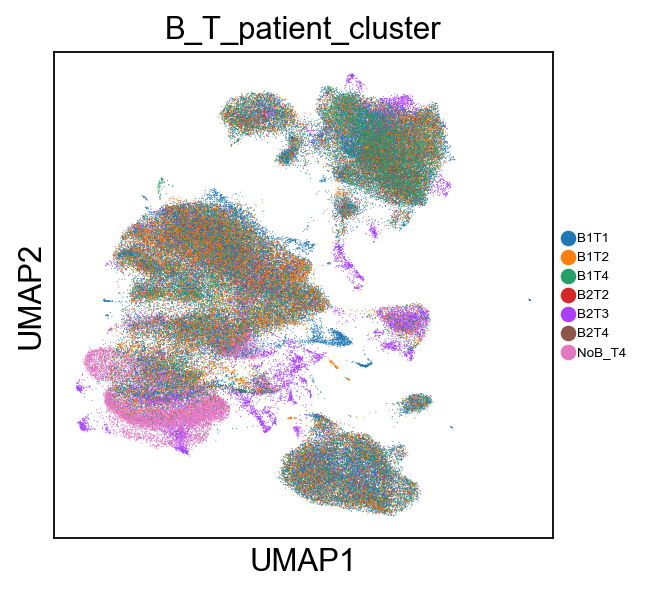

In [18]:
cell_dict = {'B1T1': ["P065",	"P062",	"P030",	"P057",	"P063",	"P012",	"P056",	"P027",	"P008",	"P001",	"P130",	"P028",	"P011",	"P126",	"P061",	"P010",	"P021",	"P015",	"P020",	"P032",	"P127",	"P049",	"P016",
],
             'B1T2':["P104",	"P128",	"P054",	"P002",	"P079",	"P076",	"P023",	"P084",	"P087",	"P017",	"P026",	"P042",	"P083",	"P019",	"P036",	"P037",	"P089",
],
             'B1T3':[],
             'B1T4':["P074",	"P052",	"P039",	"P075",	"P091",	"P009B",	"P024",	"P022",	"P080",	"P082",	"P047",	"P038",
],
            
             'B2T1': [],
            'B2T2': ["P048",	"P094",	"P031",	"P107",
],
             'B2T3':["P866",	"P836",	"P846",	"P986",	"P585",	"P658",	"P865",	"P944",	"P787",	"P686",
],
             'B2T4':["P040",	"P044",
],
             'NoB_T4':['P009A']
             
              }

# Initialize empty column in cell metadata
adata_epi.obs['B_T_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_epi.obs.patient).isin(cell_dict[i])
    adata_epi.obs.loc[ind,'B_T_patient_cluster'] = i

sc.pl.umap(adata_epi, color=['B_T_patient_cluster'], legend_loc='right margin', legend_fontsize=6,)# save='umap_Fibro_T_patient_cluster_in_T_cell.pdf')


In [19]:
#for fGSEA
sc.tl.rank_genes_groups(adata_epi, groupby='B_T_patient_cluster', method='wilcoxon', use_raw=True,  key_added = "BtoT_rank_fgsea")
result = adata_epi.uns['BtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/epi_cell_BtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['BtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:04:21)


In [20]:
adata_epi.write('Epi_cell_04-25-23.h5ad', compression='gzip')

# T cell

In [21]:
adata_T = sc.read('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

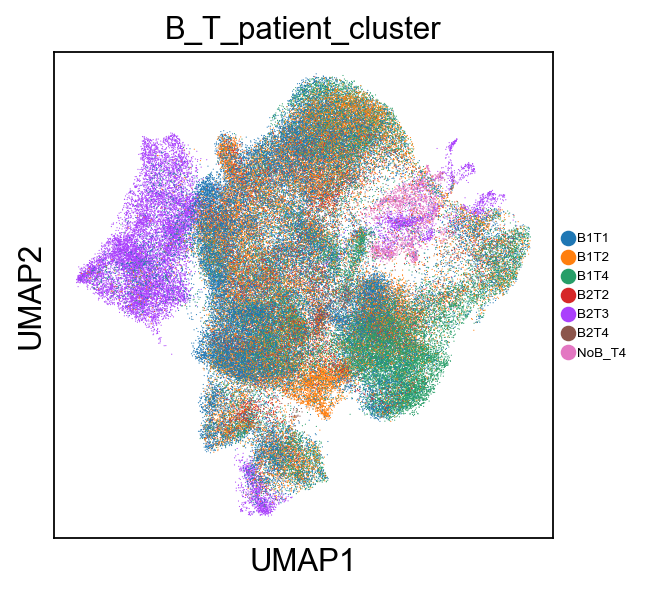

In [25]:
cell_dict = {'B1T1': ["P065",	"P062",	"P030",	"P057",	"P063",	"P012",	"P056",	"P027",	"P008",	"P001",	"P130",	"P028",	"P011",	"P126",	"P061",	"P010",	"P021",	"P015",	"P020",	"P032",	"P127",	"P049",	"P016",
],
             'B1T2':["P104",	"P128",	"P054",	"P002",	"P079",	"P076",	"P023",	"P084",	"P087",	"P017",	"P026",	"P042",	"P083",	"P019",	"P036",	"P037",	"P089",
],
             'B1T3':[],
             'B1T4':["P074",	"P052",	"P039",	"P075",	"P091",	"P009B",	"P024",	"P022",	"P080",	"P082",	"P047",	"P038",
],
            
             'B2T1': [],
            'B2T2': ["P048",	"P094",	"P031",	"P107",
],
             'B2T3':["P866",	"P836",	"P846",	"P986",	"P585",	"P658",	"P865",	"P944",	"P787",	"P686",
],
             'B2T4':["P040",	"P044",
],
             'NoB_T4':['P009A']
             
              }

# Initialize empty column in cell metadata
adata_T.obs['B_T_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'B_T_patient_cluster'] = i

sc.pl.umap(adata_T, color=['B_T_patient_cluster'], legend_loc='right margin', legend_fontsize=6,)# save='umap_Fibro_T_patient_cluster_in_T_cell.pdf')


In [26]:
#for fGSEA
sc.tl.rank_genes_groups(adata_T, groupby='B_T_patient_cluster', method='wilcoxon', use_raw=True,  key_added = "BtoT_rank_fgsea")
result = adata_T.uns['BtoT_rank_fgsea']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:5]: result[key][group]
    for group in groups for key in ['names', 'scores','logfoldchanges', 'pvals', 'pvals_adj']}).to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/fgsea/T_cell_BtoT_cluster_fgesa.csv")
# logFC becomes negative or disappear when use_raw=False, could be Scanpy bug


ranking genes
    finished: added to `.uns['BtoT_rank_fgsea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:31)


In [27]:
adata_T.write('T_cell_04-25-23.h5ad', compression='gzip')